# LetsGrowMore Data Science internship Aug-2021

# Task-2  Exploratoray Data Analysis on Terrorism Dataset 

# Problem Statement
- As a security/defense analyst,try to find the hot zone of terrorism
- Can choose any tool like (Python/R/Tableau/Power BI/Excel/SAP/SAS


# Dataset link
- https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

# importing libraries 

In [1]:
# Importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

# to avoid errors in reading dataset warning module is used
import warnings
warnings.filterwarnings('ignore')



In [2]:
#Reading dataset
df=pd.read_csv(r'C:\\Users\\saipr\\OneDrive\\Documents\\globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [3]:
#Reading first 5 columns of dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#To get number of rows and columns in dataset
df.shape

(181691, 135)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
# Visualising all columns in the dataset
df.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [7]:
# Checking if there are any null values
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

# Renaming the columns

In [8]:
# Renaming the wanted columns
df.rename(columns=({'iyear':'year','imonth':'month','iday':'day','approxdate':'date','country':'country','country_txt':'country_names','region':'region','region_txt':'region_names','provstate':'state','city':'city','latitude':'latitude','longitude':'longitude','summary':'summary','success':'success','suicide':'suicide','attacktype1':'attack_type','attacktype1_txt':'attacktype_name','targtype1':'target_type','targtype1_txt':'targettype_name','gname':'group','individual':'individual'}),inplace=True)
df.head()

,eventid,year,month,day,date,extended,resolution,country,country_names,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Data Preprocessing

In [9]:
# Selecting the columns which are necessary for EDA
df1=df[['year','month','day','country','country_names','region','region_names','state','city','success','suicide','attack_type','attacktype_name','nkill','nwound','target_type','targettype_name','group','individual']]

In [10]:
#Reading first five rows of new dataset
df1.head()

,year,month,day,country,country_names,region,region_names,state,city,success,suicide,attack_type,attacktype_name,nkill,nwound,target_type,targettype_name,group,individual
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,1,0,1,Assassination,1.0,0.0,14,Private Citizens & Property,MANO-D,0
1,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,1,0,6,Hostage Taking (Kidnapping),0.0,0.0,7,Government (Diplomatic),23rd of September Communist League,0
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,0,1,Assassination,1.0,0.0,10,Journalists & Media,Unknown,0
3,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,1,0,3,Bombing/Explosion,NaN,NaN,7,Government (Diplomatic),Unknown,0
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,1,0,7,Facility/Infrastructure Attack,NaN,NaN,7,Government (Diplomatic),Unknown,0


In [11]:
#Rows and columns of new dataset
df1.shape

(181691, 19)

In [12]:
#Checking for null values in new data set
df1.isnull().sum()

year                   0
month                  0
day                    0
country                0
country_names          0
region                 0
region_names           0
state                421
city                 434
success                0
suicide                0
attack_type            0
attacktype_name        0
nkill              10313
nwound             16311
target_type            0
targettype_name        0
group                  0
individual             0
dtype: int64

## Filling null values of state and city columns by using bfill

In [13]:
#Replacing null values with zero
df1.fillna(0,inplace=True)

In [14]:
#Checking all the unique values in state column
df1['state'].unique().tolist()

[0,
 'Federal',
 'Tarlac',
 'Attica',
 'Fukouka',
 'Illinois',
 'Montevideo',
 'California',
 'Wisconsin',
 'Colorado',
 'Lazio',
 'Michigan',
 'Puerto Rico',
 'Berlin',
 'Unknown',
 'New York',
 'Washington',
 'New Jersey',
 'Guatemala',
 'Metropolitan Manila',
 'Caracas',
 'Nebraska',
 'Mississippi',
 'Ohio',
 'Florida',
 'Oregon',
 'Massachusetts',
 'Bavaria',
 'Maryland',
 'Louisiana',
 'Connecticut',
 'Hesse',
 'Zurich',
 'Arizona',
 'Khalil',
 'Metropolitian Manila',
 'Alabama',
 'New Mexico',
 'Sao Paulo',
 'Alexandria',
 'Montana',
 'District of Columbia',
 'Pampanga',
 'National',
 'Corrientes',
 'Buenos Aires',
 'Beirut',
 'Georgia',
 'Texas',
 'Dublin',
 'Rio Grande do Sul',
 'Kansas',
 'Missouri',
 'Amman',
 'Istanbul',
 'Pennsylvania',
 'Minnesota',
 'Iowa',
 'Indiana',
 'Asuncion',
 'North Carolina',
 'Oklahoma',
 'Idaho',
 'Geneva',
 'Utah',
 'Capiz',
 'Lara',
 'Tehran',
 'Rio de Janeiro',
 'Northern Ireland',
 'Caldas',
 'Managua',
 'Pernambuco',
 'Navarre',
 'North Hol

In [15]:
#All null values got replaced after filling it by 0
df1.isnull().sum()

year               0
month              0
day                0
country            0
country_names      0
region             0
region_names       0
state              0
city               0
success            0
suicide            0
attack_type        0
attacktype_name    0
nkill              0
nwound             0
target_type        0
targettype_name    0
group              0
individual         0
dtype: int64

In [16]:
#Data set is cleaned

In [17]:
# Checking what is present in new dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             181691 non-null  int64  
 1   month            181691 non-null  int64  
 2   day              181691 non-null  int64  
 3   country          181691 non-null  int64  
 4   country_names    181691 non-null  object 
 5   region           181691 non-null  int64  
 6   region_names     181691 non-null  object 
 7   state            181691 non-null  object 
 8   city             181691 non-null  object 
 9   success          181691 non-null  int64  
 10  suicide          181691 non-null  int64  
 11  attack_type      181691 non-null  int64  
 12  attacktype_name  181691 non-null  object 
 13  nkill            181691 non-null  float64
 14  nwound           181691 non-null  float64
 15  target_type      181691 non-null  int64  
 16  targettype_name  181691 non-null  obje

In [18]:
# To check number of unique values in dataset
df1.nunique()

year                  47
month                 13
day                   32
country              205
country_names        205
region                12
region_names          12
state               2856
city               36675
success                2
suicide                2
attack_type            9
attacktype_name        9
nkill                205
nwound               238
target_type           22
targettype_name       22
group               3537
individual             2
dtype: int64

In [19]:
#Statistical analysis of dataset
df1.describe()

,year,month,day,country,region,success,suicide,attack_type,nkill,nwound,target_type,individual
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,131.968501,7.160938,0.889598,0.036507,3.247547,2.266860,2.883296,8.439719,0.002950
std,13.259430,3.388303,8.814045,112.414535,2.933408,0.313391,0.187549,1.915772,11.227057,34.309747,6.653838,0.054234
min,1970.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1991.000000,4.000000,8.000000,78.000000,5.000000,1.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000
50%,2009.000000,6.000000,15.000000,98.000000,6.000000,1.000000,0.000000,3.000000,0.000000,0.000000,4.000000,0.000000
75%,2014.000000,9.000000,23.000000,160.000000,10.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000
max,2017.000000,12.000000,31.000000,1004.000000,12.000000,1.000000,1.000000,9.000000,1570.000000,8191.000000,22.000000,1.000000


In [20]:
#Correlation of dataset
correlation=df1.corr()
correlation

,year,month,day,country,region,success,suicide,attack_type,nkill,nwound,target_type,individual
year,1.000000,0.000139,0.018254,-0.135023,0.401384,-0.082963,0.137736,0.074153,0.021252,0.017484,0.079082,0.017944
month,0.000139,1.000000,0.005497,-0.006305,-0.002999,-0.002845,0.003071,0.006705,0.004031,0.003178,-0.000948,-0.001661
day,0.018254,0.005497,1.000000,0.003468,0.009710,-0.011802,0.003593,-0.005333,-0.003225,-0.001082,-0.000052,-0.003788
country,-0.135023,-0.006305,0.003468,1.000000,0.148597,-0.037827,-0.050360,-0.021384,-0.014383,-0.006351,-0.019703,0.027918
region,0.401384,-0.002999,0.009710,0.148597,1.000000,-0.030909,0.112672,0.007642,0.043113,0.019211,0.041396,-0.059963
success,-0.082963,-0.002845,-0.011802,-0.037827,-0.030909,1.000000,-0.031155,0.048408,0.049619,0.023346,-0.059637,-0.013868
suicide,0.137736,0.003071,0.003593,-0.050360,0.112672,-0.031155,1.000000,-0.029962,0.136385,0.096101,-0.023440,0.000775
attack_type,0.074153,0.006705,-0.005333,-0.021384,0.007642,0.048408,-0.029962,1.000000,-0.003448,-0.001424,0.014513,0.016438
nkill,0.021252,0.004031,-0.003225,-0.014383,0.043113,0.049619,0.136385,-0.003448,1.000000,0.443326,0.008466,-0.001275
nwound,0.017484,0.003178,-0.001082,-0.006351,0.019211,0.023346,0.096101,-0.001424,0.443326,1.000000,0.010709,0.008432


In [21]:
df1.count()

year               181691
month              181691
day                181691
country            181691
country_names      181691
region             181691
region_names       181691
state              181691
city               181691
success            181691
suicide            181691
attack_type        181691
attacktype_name    181691
nkill              181691
nwound             181691
target_type        181691
targettype_name    181691
group              181691
individual         181691
dtype: int64

In [22]:
df1.loc[133458:133466]

,year,month,day,country,country_names,region,region_names,state,city,success,suicide,attack_type,attacktype_name,nkill,nwound,target_type,targettype_name,group,individual
133458,2014,6,14,214,Ukraine,9,Eastern Europe,Donetsk,Avdiyivka,1,0,6,Hostage Taking (Kidnapping),0.0,0.0,4,Military,Unknown,0
133459,2014,6,14,92,India,6,South Asia,Assam,Chirang,1,0,6,Hostage Taking (Kidnapping),0.0,0.0,14,Private Citizens & Property,Unknown,0
133460,2014,6,14,4,Afghanistan,6,South Asia,Nangarhar,Unknown,1,0,7,Facility/Infrastructure Attack,0.0,0.0,2,Government (General),Unknown,0
133461,2014,6,14,4,Afghanistan,6,South Asia,Nangarhar,Unknown,1,0,7,Facility/Infrastructure Attack,0.0,0.0,2,Government (General),Unknown,0
133462,2014,6,14,4,Afghanistan,6,South Asia,Nangarhar,Unknown,1,0,7,Facility/Infrastructure Attack,0.0,0.0,2,Government (General),Unknown,0
133463,2014,6,14,4,Afghanistan,6,South Asia,Nangarhar,Unknown,1,0,7,Facility/Infrastructure Attack,0.0,0.0,2,Government (General),Unknown,0
133464,2014,6,14,4,Afghanistan,6,South Asia,Nangarhar,Unknown,1,0,7,Facility/Infrastructure Attack,0.0,0.0,2,Government (General),Unknown,0
133465,2014,6,14,4,Afghanistan,6,South Asia,Nangarhar,Unknown,1,0,7,Facility/Infrastructure Attack,0.0,0.0,2,Government (General),Unknown,0
133466,2014,6,14,4,Afghanistan,6,South Asia,Nangarhar,Unknown,1,0,7,Facility/Infrastructure Attack,0.0,0.0,2,Government (General),Unknown,0


In [23]:
# Getting rank
df1.rank()

,year,month,day,country,region,success,suicide,attack_type,nkill,nwound,target_type,individual
0,326.0,99612.5,10212.5,33157.5,8628.5,100875.5,87529.5,9656.5,116750.5,59793.5,130422.0,90578.0
1,326.0,10.5,446.0,98807.5,1728.5,100875.5,87529.5,157465.5,49231.5,59793.5,97835.0,90578.0
2,326.0,7488.5,446.0,134108.5,39823.0,100875.5,87529.5,9656.5,116750.5,59793.5,105734.5,90578.0
3,326.0,7488.5,446.0,45800.0,99922.0,100875.5,87529.5,106109.0,49231.5,59793.5,97835.0,90578.0
4,326.0,7488.5,446.0,91627.5,33179.5,100875.5,87529.5,168222.5,49231.5,59793.5,97835.0,90578.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,176241.5,174943.5,180144.0,142816.5,172634.5,100875.5,87529.5,40647.0,116750.5,140729.0,80450.5,90578.0
181687,176241.5,174943.5,180144.0,155608.0,138622.5,100875.5,87529.5,106109.0,142112.0,165915.0,80450.5,90578.0
181688,176241.5,174943.5,180144.0,134108.5,39823.0,100875.5,87529.5,168222.5,49231.5,59793.5,130422.0,90578.0
181689,176241.5,174943.5,180144.0,55200.5,68552.5,10030.0,87529.5,106109.0,49231.5,59793.5,31311.0,90578.0


In [24]:
# Checking the median of every column
df1.median()

year           2009.0
month             6.0
day              15.0
country          98.0
region            6.0
success           1.0
suicide           0.0
attack_type       3.0
nkill             0.0
nwound            0.0
target_type       4.0
individual        0.0
dtype: float64

In [25]:
df1.head()

,year,month,day,country,country_names,region,region_names,state,city,success,suicide,attack_type,attacktype_name,nkill,nwound,target_type,targettype_name,group,individual
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,1,0,1,Assassination,1.0,0.0,14,Private Citizens & Property,MANO-D,0
1,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,1,0,6,Hostage Taking (Kidnapping),0.0,0.0,7,Government (Diplomatic),23rd of September Communist League,0
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,0,1,Assassination,1.0,0.0,10,Journalists & Media,Unknown,0
3,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,1,0,3,Bombing/Explosion,0.0,0.0,7,Government (Diplomatic),Unknown,0
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,1,0,7,Facility/Infrastructure Attack,0.0,0.0,7,Government (Diplomatic),Unknown,0


In [26]:
#Replacing 0 by using bfill method in every case
new_df=df1.replace(0,method='bfill')

In [27]:
new_df

,year,month,day,country,country_names,region,region_names,state,city,success,suicide,attack_type,attacktype_name,nkill,nwound,target_type,targettype_name,group,individual
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,Federal,Santo Domingo,1,1,1,Assassination,1.0,1.0,14,Private Citizens & Property,MANO-D,1
1,1970,1,1,130,Mexico,1,North America,Federal,Mexico city,1,1,6,Hostage Taking (Kidnapping),1.0,1.0,7,Government (Diplomatic),23rd of September Communist League,1
2,1970,1,1,160,Philippines,5,Southeast Asia,Tarlac,Unknown,1,1,1,Assassination,1.0,1.0,10,Journalists & Media,Unknown,1
3,1970,1,1,78,Greece,8,Western Europe,Attica,Athens,1,1,3,Bombing/Explosion,1.0,1.0,7,Government (Diplomatic),Unknown,1
4,1970,1,1,101,Japan,4,East Asia,Fukouka,Fukouka,1,1,7,Facility/Infrastructure Attack,1.0,1.0,7,Government (Diplomatic),Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,1,0,2,Armed Assault,1.0,2.0,4,Military,Al-Shabaab,0
181687,2017,12,31,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,1,0,3,Bombing/Explosion,2.0,7.0,4,Military,Muslim extremists,0
181688,2017,12,31,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,1,0,7,Facility/Infrastructure Attack,0.0,0.0,14,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),0
181689,2017,12,31,92,India,6,South Asia,Manipur,Imphal,0,0,3,Bombing/Explosion,0.0,0.0,2,Government (General),Unknown,0


In [28]:
#Checking for the top rows of attack type column
new_df.sort_values(by='attack_type',ascending=False)[:30]

,year,month,day,country,country_names,region,region_names,state,city,success,suicide,attack_type,attacktype_name,nkill,nwound,target_type,targettype_name,group,individual
165889,2016,8,11,4,Afghanistan,6,South Asia,Faryab,Khwaja Sabz Posh district,1,1,9,Unknown,1.0,20.0,14,Private Citizens & Property,Unknown,1
150438,2015,7,10,37,Cameroon,11,Sub-Saharan Africa,Extreme-North,Fotokol,1,1,9,Unknown,2.0,1.0,7,Government (Diplomatic),Unknown,1
150436,2015,7,10,4,Afghanistan,6,South Asia,Kunar,Gulsaik,1,1,9,Unknown,2.0,1.0,4,Military,Taliban,1
27394,1986,2,26,110,Lebanon,10,Middle East & North Africa,South,Salhani,1,1,9,Unknown,1.0,4.0,4,Military,Muslim Militants,1
27404,1986,2,27,45,Colombia,3,South America,Antioquia,Itagui,1,1,9,Unknown,3.0,2.0,1,Business,Popular Liberation Army (EPL),1
174789,2017,5,15,209,Turkey,10,Middle East & North Africa,Diyarbakir,Dicle district,1,1,9,Unknown,1.0,1.0,17,Terrorists/Non-State Militia,Kurdistan Workers' Party (PKK),1
174790,2017,5,15,209,Turkey,10,Middle East & North Africa,Sirnak,Gormec,1,1,9,Unknown,1.0,1.0,4,Military,Kurdistan Workers' Party (PKK),1
27405,1986,2,27,159,Peru,3,South America,Apurimac,Aymaraes district,1,1,9,Unknown,3.0,2.0,14,Private Citizens & Property,Unknown,1
27406,1986,2,27,159,Peru,3,South America,Apurimac,Toraya,1,1,9,Unknown,18.0,2.0,14,Private Citizens & Property,Unknown,1
27413,1986,3,1,8,Angola,11,Sub-Saharan Africa,Lunda Norte,Andrada,1,1,9,Unknown,75.0,7.0,14,Private Citizens & Property,National Union for the Total Independence of A...,1


In [29]:
#Checking for how many times a particular city has occured
new_df['city'].value_counts()

Unknown          9785
Baghdad          7622
Karachi          2657
Lima             2359
Mosul            2270
                 ... 
Finca Bonanza       1
Beni Aïssi          1
Kafr Yasuf          1
El Tarf             1
Ghurian             1
Name: city, Length: 36674, dtype: int64

In [30]:
# Finding correlation of dataset
new_df.corr()

,year,month,day,country,region,success,suicide,attack_type,nkill,nwound,target_type,individual
year,1.000000,0.000076,0.017986,-0.135023,0.401384,-0.003593,-0.010781,0.074153,-0.004746,-0.013208,0.079082,-0.028982
month,0.000076,1.000000,0.005735,-0.006313,-0.003021,-0.005418,-0.016254,0.006740,0.001780,0.004894,-0.000956,-0.043695
day,0.017986,0.005735,1.000000,0.003366,0.009841,-0.005836,-0.017446,-0.004208,-0.005757,-0.003035,0.000475,-0.040447
country,-0.135023,-0.006313,0.003366,1.000000,0.148597,0.000176,0.001680,-0.021384,-0.004934,-0.000127,-0.019703,0.004761
region,0.401384,-0.003021,0.009841,0.148597,1.000000,0.001879,-0.000585,0.007642,0.007115,-0.003515,0.041396,-0.011583
success,-0.003593,-0.005418,-0.005836,0.000176,0.001879,1.000000,0.333319,0.000429,0.001051,0.000655,-0.001277,0.123991
suicide,-0.010781,-0.016254,-0.017446,0.001680,-0.000585,0.333319,1.000000,-0.003910,0.000884,0.001112,0.001904,0.371989
attack_type,0.074153,0.006740,-0.004208,-0.021384,0.007642,0.000429,-0.003910,1.000000,0.031953,0.008163,0.014513,-0.011047
nkill,-0.004746,0.001780,-0.005757,-0.004934,0.007115,0.001051,0.000884,0.031953,1.000000,0.292432,0.016503,-0.002754
nwound,-0.013208,0.004894,-0.003035,-0.000127,-0.003515,0.000655,0.001112,0.008163,0.292432,1.000000,0.013046,0.001730


In [31]:
#Checking the covariance of dataset
new_df.cov()

,year,month,day,country,region,success,suicide,attack_type,nkill,nwound,target_type,individual
year,175.812496,0.003398,2.098163,-201.258743,15.611960,-0.000158,-0.001423,1.883636,-0.981518,-7.149885,6.977080,-0.010275
month,0.003398,11.479286,0.170948,-2.404321,-0.030028,-0.000061,-0.000548,0.043747,0.094048,0.676944,-0.021542,-0.003959
day,2.098163,0.170948,77.407488,3.329143,0.253983,-0.000170,-0.001528,-0.070921,-0.789993,-1.090011,0.027799,-0.009515
country,-201.258743,-2.404321,3.329143,12637.027755,49.001129,0.000066,0.001879,-4.605181,-8.650247,-0.581577,-14.737655,0.014310
region,15.611960,-0.030028,0.253983,49.001129,8.604882,0.000018,-0.000017,0.042944,0.325510,-0.421009,0.807993,-0.000909
success,-0.000158,-0.000061,-0.000170,0.000066,0.000018,0.000011,0.000011,0.000003,0.000054,0.000089,-0.000028,0.000011
suicide,-0.001423,-0.000548,-0.001528,0.001879,-0.000017,0.000011,0.000099,-0.000075,0.000137,0.000452,0.000126,0.000099
attack_type,1.883636,0.043747,-0.070921,-4.605181,0.042944,0.000003,-0.000075,3.670180,0.954707,0.638494,0.185006,-0.000566
nkill,-0.981518,0.094048,-0.789993,-8.650247,0.325510,0.000054,0.000137,0.954707,243.230923,186.197044,1.712561,-0.001148
nwound,-7.149885,0.676944,-1.090011,-0.581577,-0.421009,0.000089,0.000452,0.638494,186.197044,1666.770333,3.543973,0.001889


# Exploratory Data Analysis

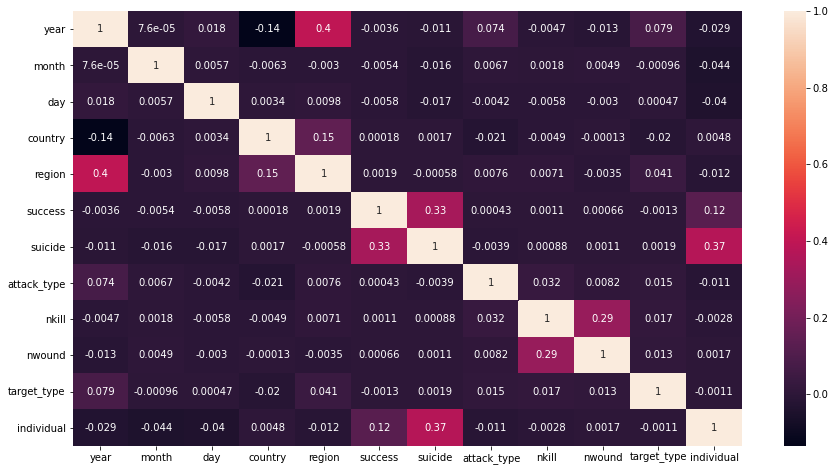

In [32]:
#Visualizing the correlation of dataset
plt.figure(figsize=(15,8))
sns.heatmap(new_df.corr(),annot=True,)
plt.show()

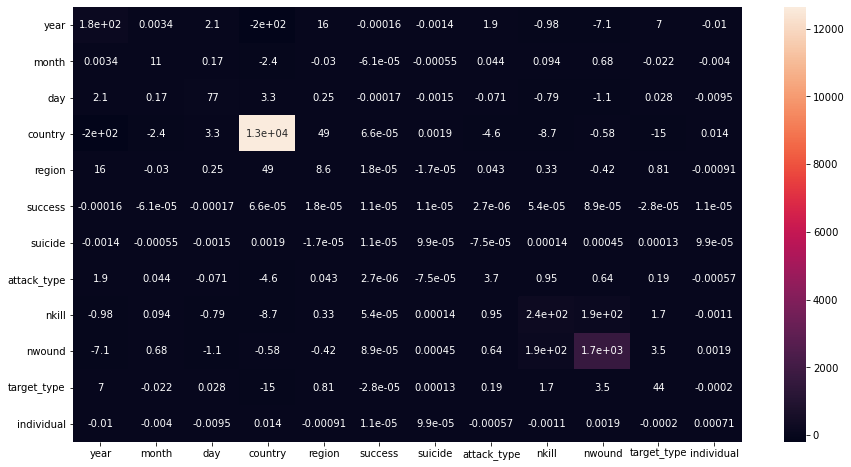

In [33]:
#Visualising the covariance of dataset by using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(new_df.cov(),annot=True)
plt.show()

In [34]:
new_df['nkill'].max()

1570.0

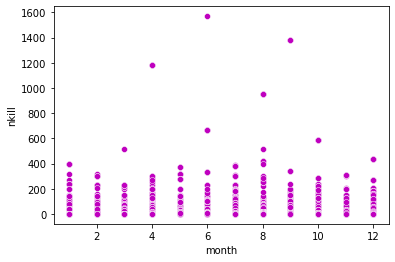

In [35]:
sns.scatterplot(data=new_df,x='month',y='nkill',color='m')
plt.show()

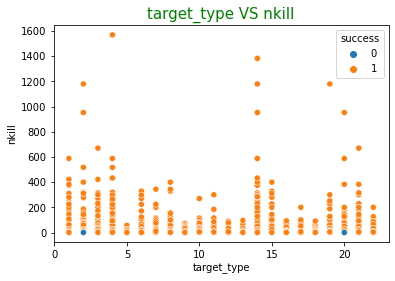

In [37]:
#plotting scatter  plot for target type VS nkill
sns.scatterplot(data=new_df,x='target_type',y='nkill',hue='success')
plt.title(label='target_type VS nkill',fontdict={'size':15,'color':'green'})
plt.show()

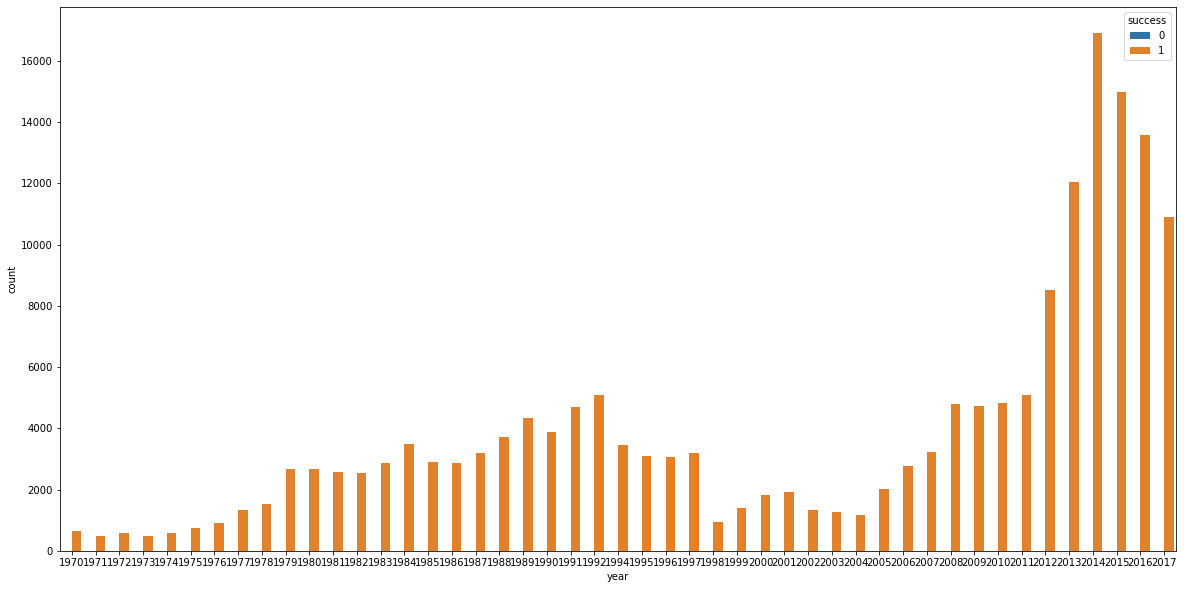

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(data=new_df,x='year',hue='success')
plt.show()

In [40]:
#To check how many times a value has been occured
new_df['suicide'].value_counts()

1    181673
0        18
Name: suicide, dtype: int64

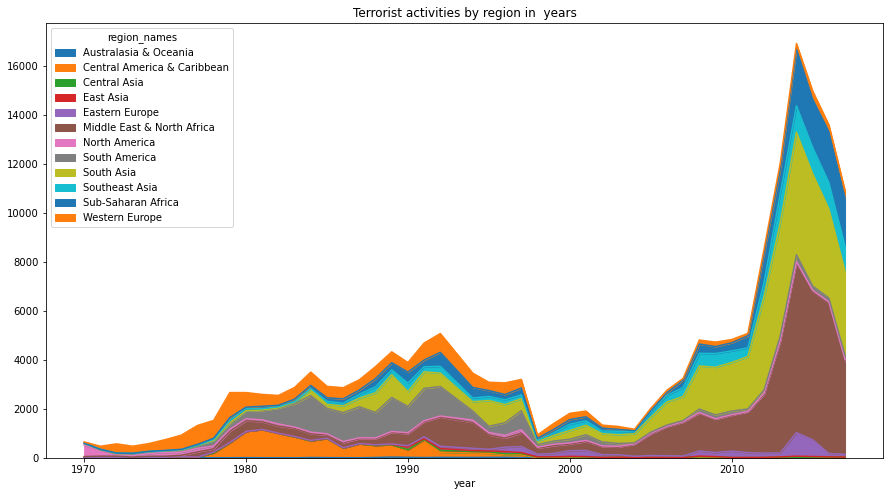

In [41]:
pd.crosstab(new_df.year,new_df.region_names).plot(kind='area',figsize=(15,8))
plt.title('Terrorist activities by region in  years')
plt.show()

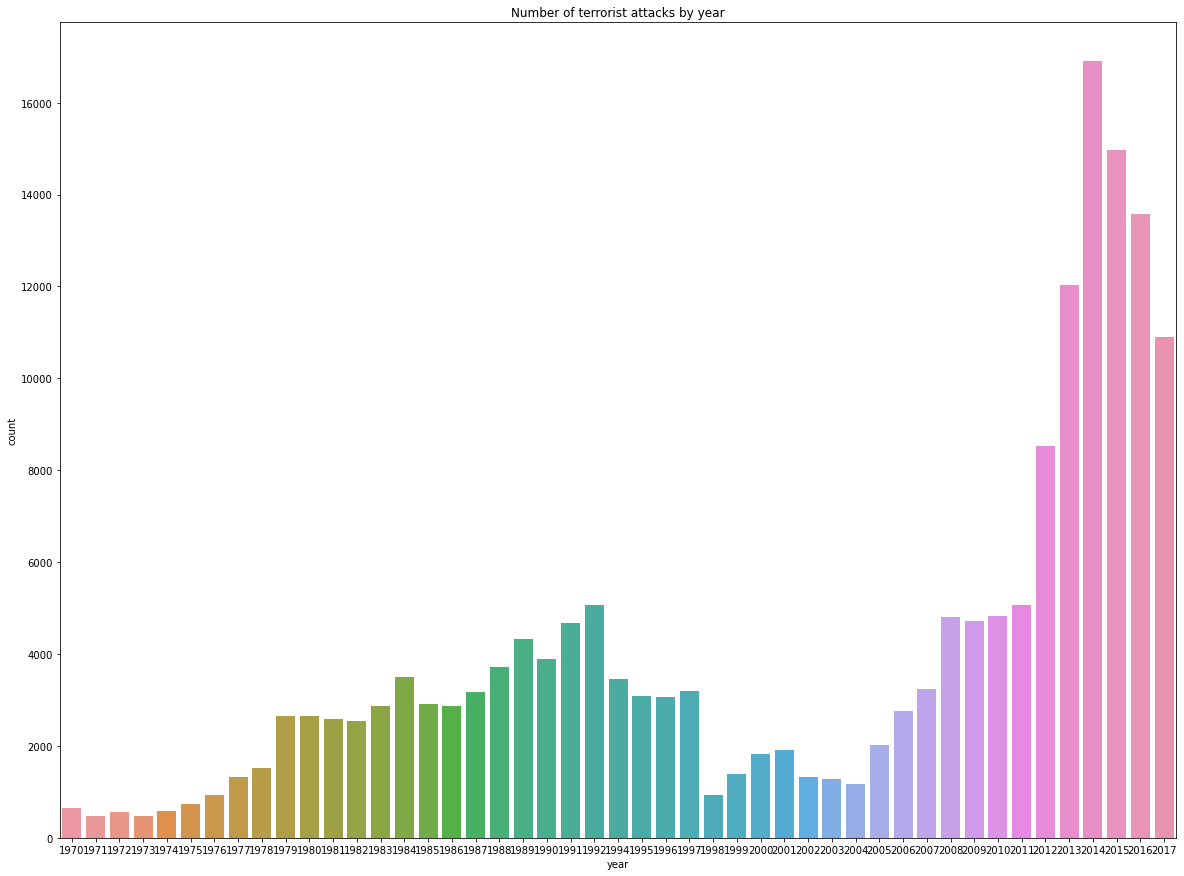

In [42]:
plt.figure(figsize=(20,15))
sns.countplot(new_df['year'])
plt.title('Number of terrorist attacks by year')
plt.show()

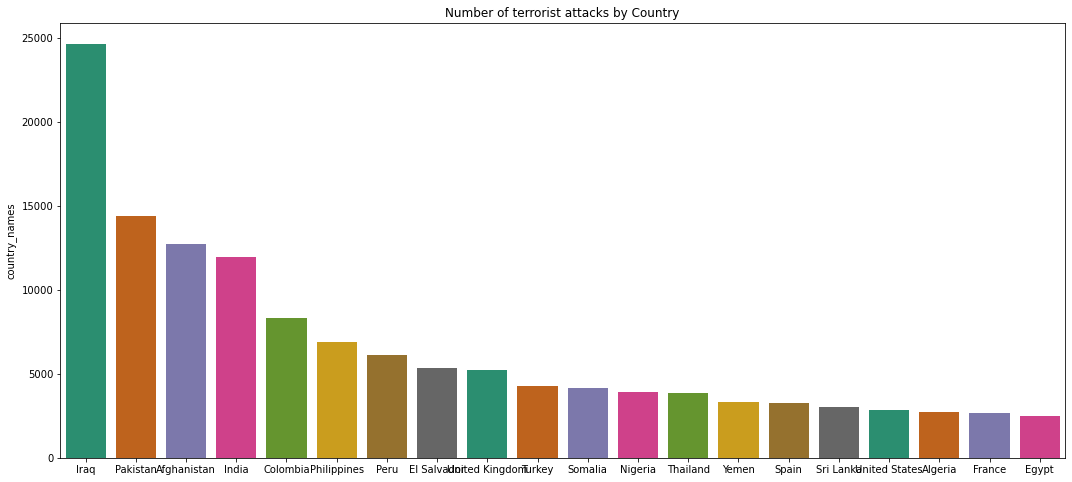

In [43]:
plt.figure(figsize=(18,8))
sns.barplot(x=new_df['country_names'].value_counts()[:20].index,y=new_df['country_names'].value_counts()[:20],palette='Dark2')
plt.title('Number of terrorist attacks by Country')
plt.show()

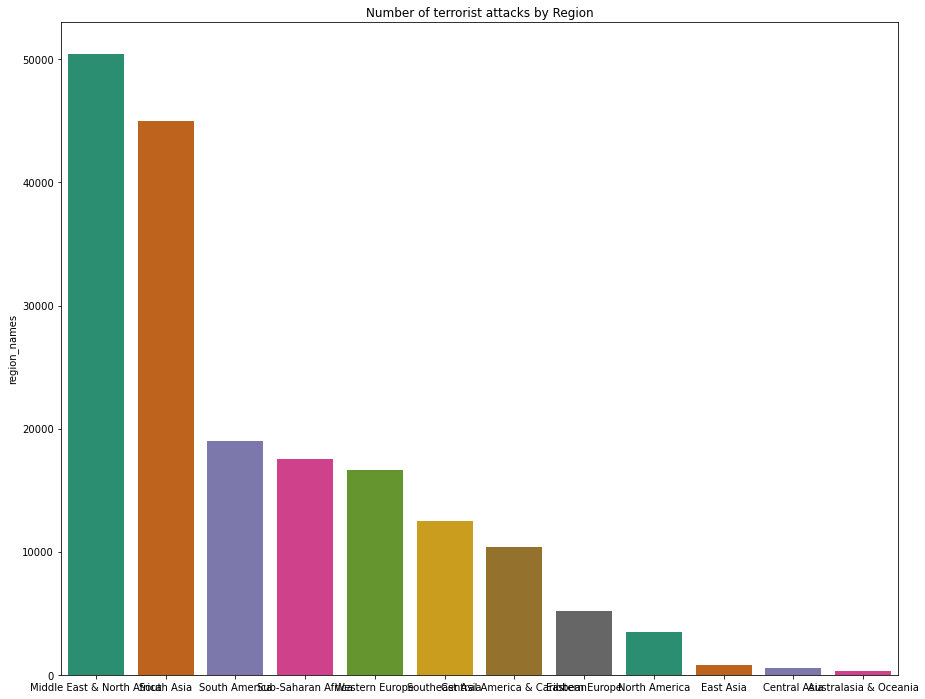

In [44]:
plt.figure(figsize=(15,12))
sns.barplot(x=new_df['region_names'].value_counts()[:20].index,y=new_df['region_names'].value_counts()[:20],palette='Dark2')
plt.title('Number of terrorist attacks by Region')
plt.show()

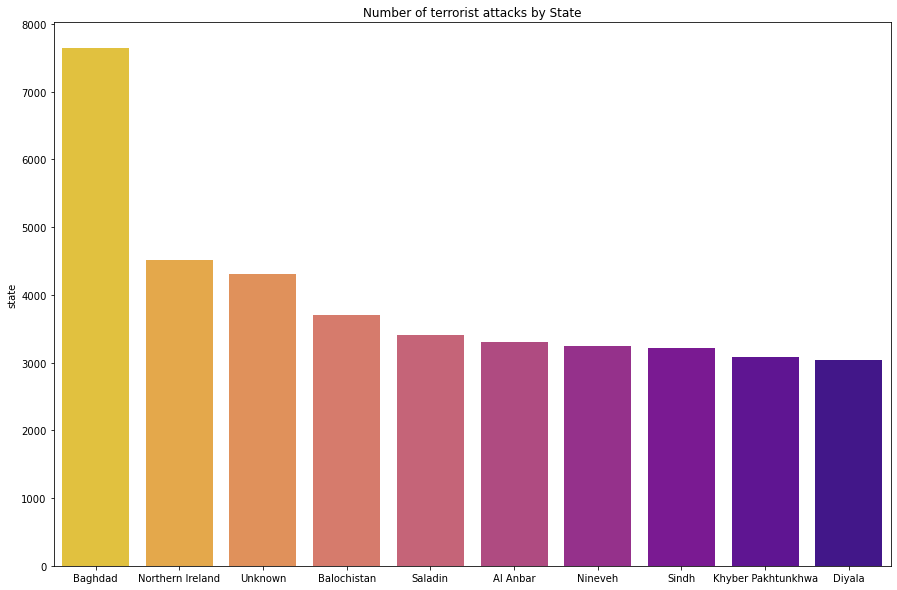

In [45]:
plt.figure(figsize=(15,10))
sns.barplot(x=new_df['state'].value_counts()[:10].index,y=new_df['state'].value_counts()[:10],palette='plasma_r')
plt.title('Number of terrorist attacks by State')
plt.show()

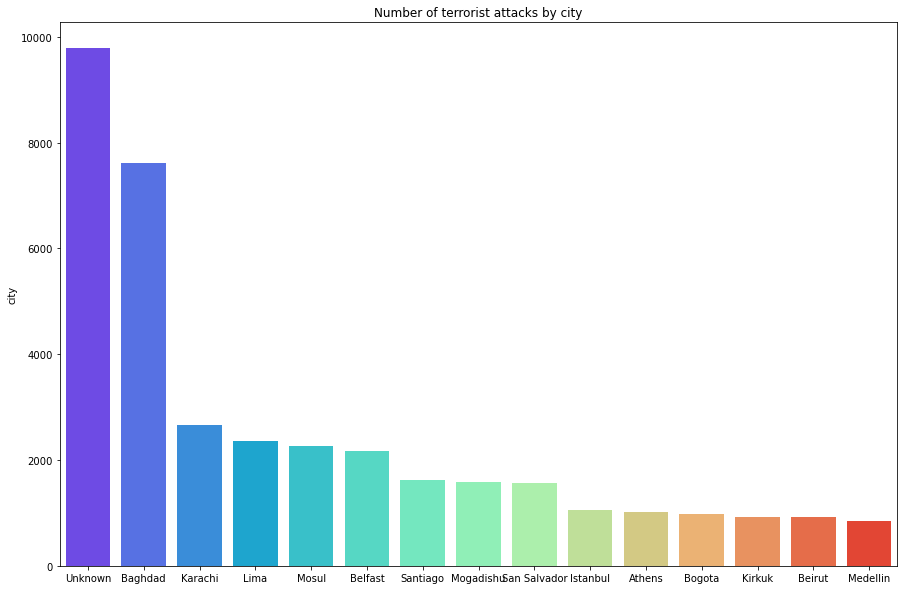

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(x=new_df['city'].value_counts()[:15].index,y=new_df['city'].value_counts()[:15],palette='rainbow')
plt.title('Number of terrorist attacks by city')
plt.show()

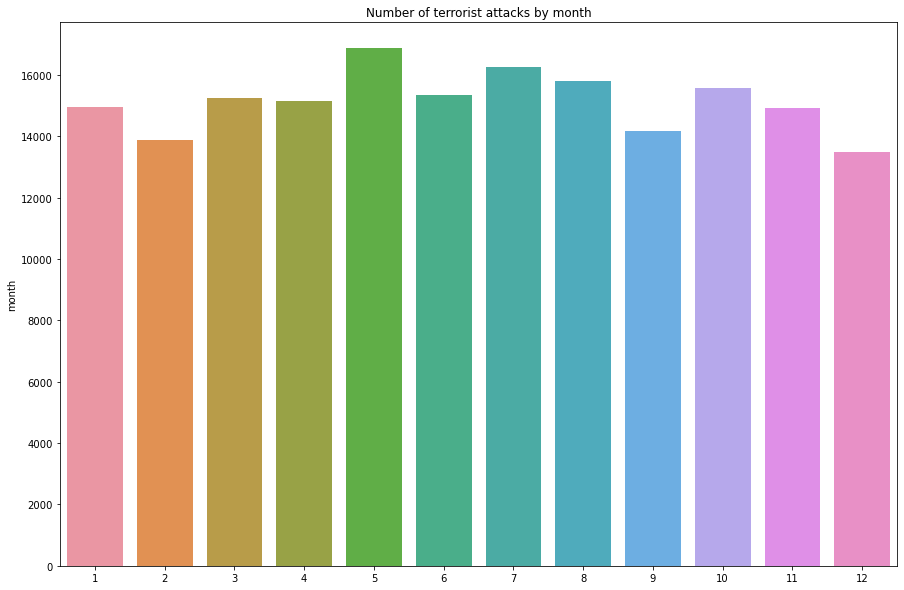

In [47]:
plt.figure(figsize=(15,10))
sns.barplot(x=new_df['month'].value_counts()[:15].index,y=new_df['month'].value_counts()[:15])
plt.title('Number of terrorist attacks by month')
plt.show()

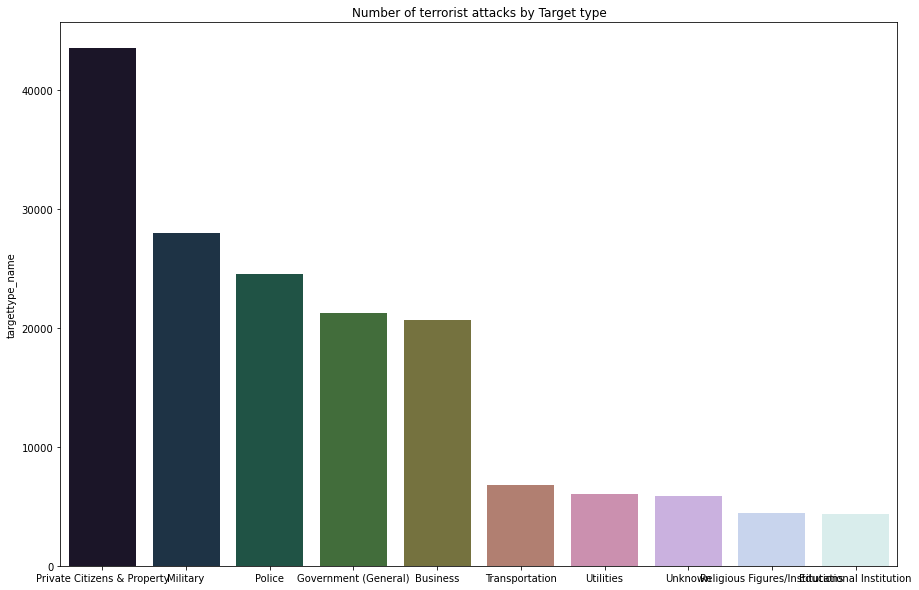

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x=new_df['targettype_name'].value_counts()[:10].index,y=new_df['targettype_name'].value_counts()[:10],palette='cubehelix')
plt.title('Number of terrorist attacks by Target type')
plt.show()

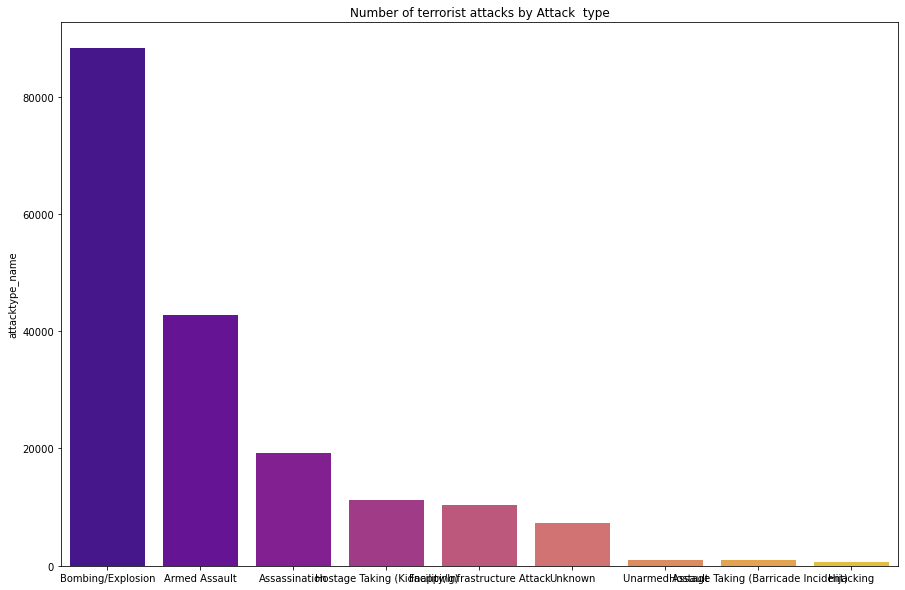

In [49]:
plt.figure(figsize=(15,10))
sns.barplot(x=new_df['attacktype_name'].value_counts()[:10].index,y=new_df['attacktype_name'].value_counts()[:10],palette='plasma')
plt.title('Number of terrorist attacks by Attack  type')
plt.show()

# Conclusion
## From the above graphs I can conclude that
- Highest number of terrorist attacks are done in the year 2014
- Highest number of attacks are done in the month of May
- Country with highest number of attacks is Iraq
- Region with highest number of attacks is Middle East and North Africa
- State with highest number of attacks is Baghdad
- City with highest number of attacks is Unknown
- Maximum targeted areas by terrorists are Private citizens and Property
- The attack type used mostly by terrorists is Bombing/Explosion
